In [60]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from   astropy.table import Table, vstack

In [61]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [62]:
from   findfile      import findfile

abacus_gold

In [68]:
survey = 'abacus'
dryrun = True

In [69]:
fpath   = findfile(ftype='gold', dryrun=dryrun, survey=survey)
fpath

DEBUG: findfile returns /global/cscratch1/sd/ldrm11/norberg/GAMA4//abacus_gold_dryrun.fits


'/global/cscratch1/sd/ldrm11/norberg/GAMA4/abacus_gold_dryrun.fits'

In [70]:
abacus_gold = Table.read(fpath)
abacus_gold

CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,DETMAG,GMR,GALTYPE,REP_GAL
float64,float64,float64,float64,float64,int32,int64
-19.87897491455078,-19.428709030151367,-15.023777961730957,-20.973269857030992,0.555567390133819,0,0
-19.73043441772461,-19.943944931030273,-14.532607078552246,-18.60902669956025,0.2953511408918104,0,0
-19.382917404174805,-19.30902862548828,-13.547659873962402,-19.897330458781838,0.9594318679977762,0,0
-18.77218246459961,-18.275964736938477,-14.267414093017578,-21.962465409052967,0.923774596681029,0,0
-18.631816864013672,-18.441221237182617,-12.880722999572754,-22.557389733284367,0.9440802383470308,0,0
-19.294681549072266,-18.47312355041504,-14.850541114807129,-21.948468035467858,0.8321651886982088,0,0
-18.246192932128906,-18.34927749633789,-12.53744888305664,-18.4256290156194,0.4196324872732653,0,0
-19.38166618347168,-18.2064151763916,-15.262474060058594,-18.362399195389838,0.29049173282099194,0,0
-19.978052139282227,-17.163951873779297,-14.177386283874512,-20.280891577910467,0.7275009557540558,0,0


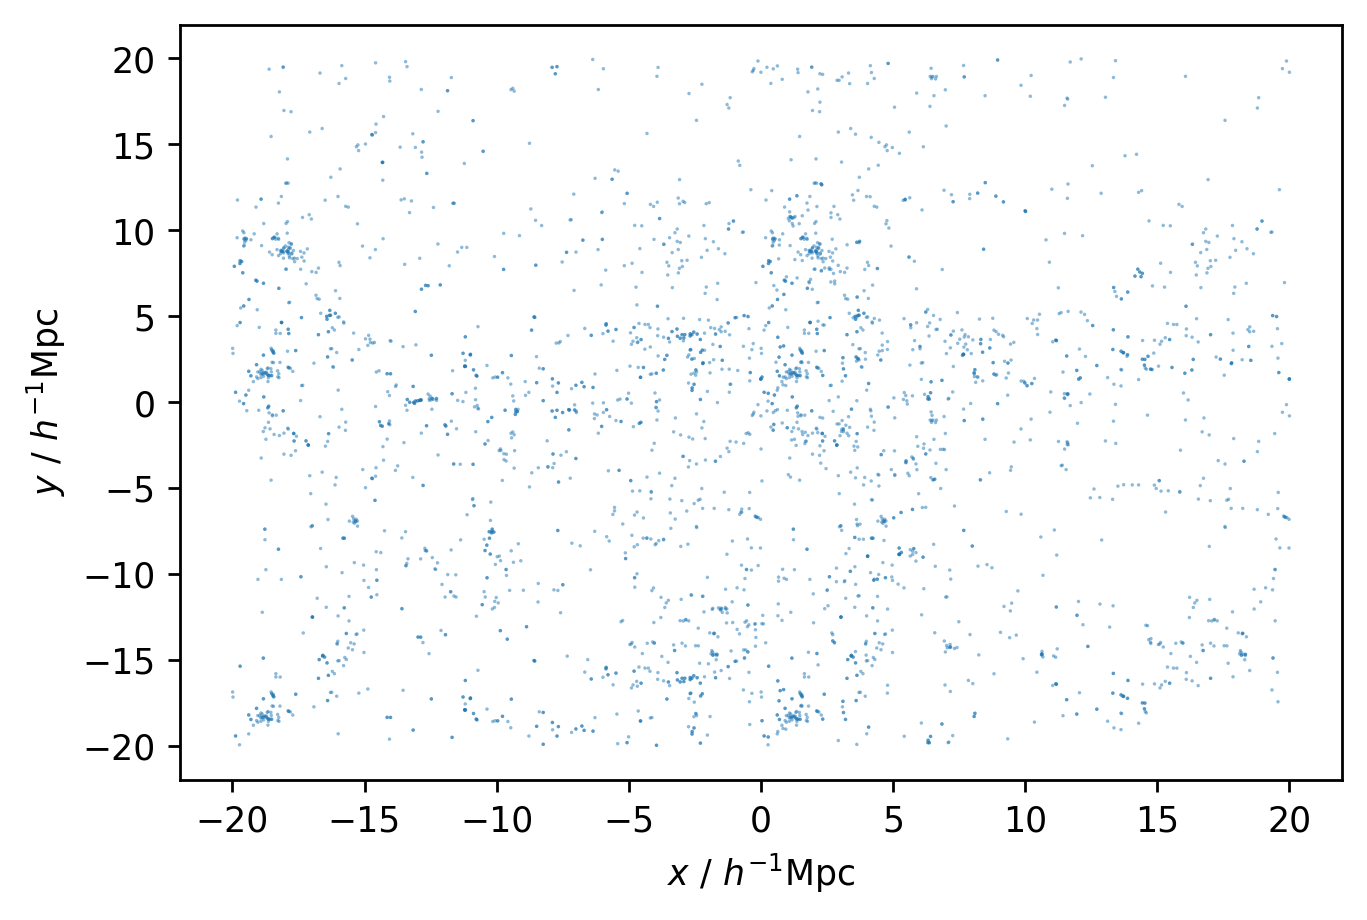

In [71]:
# narrow slice in z-direction
if not dryrun:
    keep = np.absolute(abacus_gold['CARTESIAN_Z']) < 1
    abacus_gold = abacus_gold[keep]

plt.figure(dpi=250)
plt.scatter(abacus_gold['CARTESIAN_X'], abacus_gold['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)
plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$y~/~h^{-1}\mathrm{Mpc}$")
#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)
plt.show()

In [72]:
fpath = fpath.replace('gold', 'gold_padded')

In [73]:
abacus_gold_padded = Table.read(fpath)
abacus_gold_padded

CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,DETMAG,GMR,GALTYPE,REP_GAL
float64,float64,float64,float64,float64,int32,int64
-19.87897491455078,-19.428709030151367,-15.023777961730957,-20.973269857030992,0.555567390133819,0,0
-19.73043441772461,-19.943944931030273,-14.532607078552246,-18.60902669956025,0.2953511408918104,0,0
-19.382917404174805,-19.30902862548828,-13.547659873962402,-19.897330458781838,0.9594318679977762,0,0
-18.77218246459961,-18.275964736938477,-14.267414093017578,-21.962465409052967,0.923774596681029,0,0
-18.631816864013672,-18.441221237182617,-12.880722999572754,-22.557389733284367,0.9440802383470308,0,0
-19.294681549072266,-18.47312355041504,-14.850541114807129,-21.948468035467858,0.8321651886982088,0,0
-18.246192932128906,-18.34927749633789,-12.53744888305664,-18.4256290156194,0.4196324872732653,0,0
-19.38166618347168,-18.2064151763916,-15.262474060058594,-18.362399195389838,0.29049173282099194,0,0
-19.978052139282227,-17.163951873779297,-14.177386283874512,-20.280891577910467,0.7275009557540558,0,0


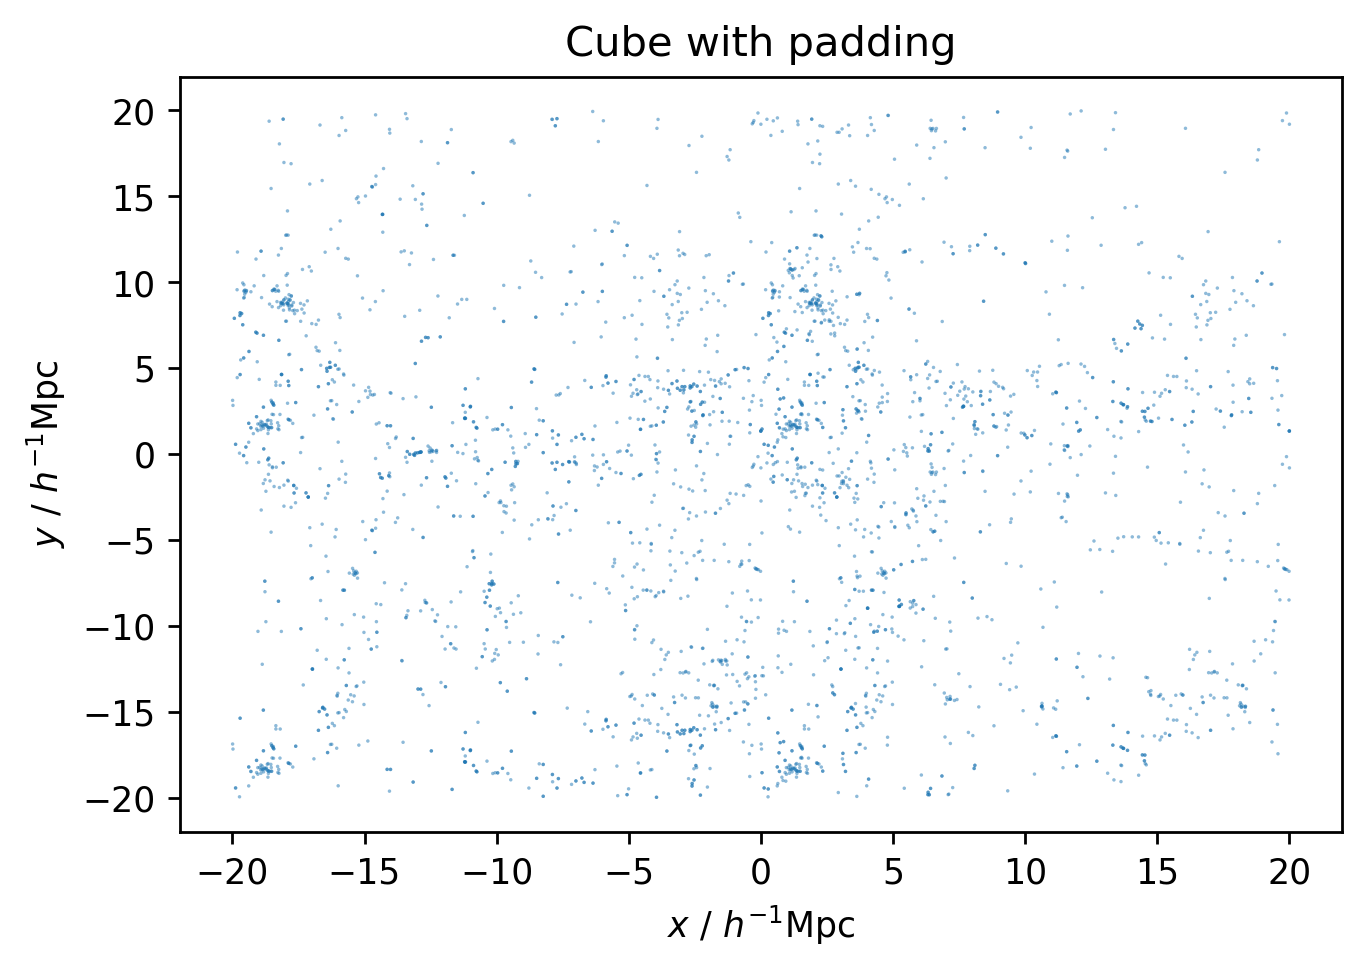

In [74]:
# narrow slice in z-direction
if not dryrun:
    keep = np.absolute(abacus_gold['CARTESIAN_Z']) < 1
    abacus_gold = abacus_gold[keep]

plt.figure(dpi=250)
plt.scatter(abacus_gold['CARTESIAN_X'], abacus_gold['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)
plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$y~/~h^{-1}\mathrm{Mpc}$")
#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)
plt.title('Cube with padding')
plt.show()